<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

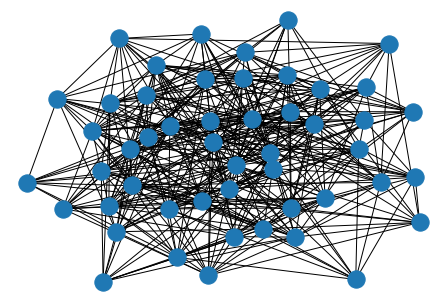

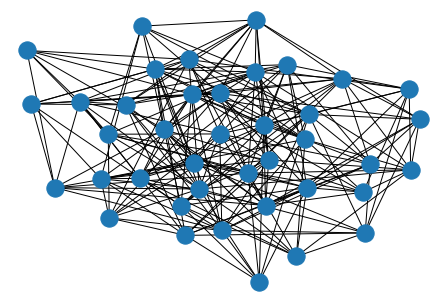

In [ ]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [ ]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]]
[[0 1 1 ... 0 1 0]
 [1 0 1 ... 1 0 0]
 [1 1 0 ... 1 0 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]]


In [ ]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [ ]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [ ]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [ ]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [ ]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][4]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][4]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][6]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][6]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][2]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][2]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][4]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][4]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][6]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][6]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][2]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][2]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][8]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][8]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][8]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2/3
                        P3 = P3/3
                      elif max(P1,P2,P3) == P2:
                        P1 = 2*P1
                        P2 = P2
                        P3 = P1/2
                      else:
                        P1 = 2*P1
                        P2 = P2/2
                        P3 = P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [ ]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [ ]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[98028, 95402, 88744, 74119, 48556, 19382, 3384, 304, 54, 21, 17, 12, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[1972, 4598, 11256, 25881, 49472, 76020, 85360, 73815, 48502, 19361, 3367, 292, 44, 11, 8, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4598, 11256, 25881, 51444, 80618, 96616, 99696, 99946, 99979, 99983, 99988, 99990, 99990, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991, 99991]
[0.0, 1328.0, 3049.0, 7429.5, 16162.75, 36651.375, 65293.6875, 87017.84375, 95562.921875, 78998.4609375, 52827.23046875, 28755.615234375, 14573.8076171875, 7317.90380859375, 3662.951904296875, 1837.4759521484375, 921.7379760742188, 460.8689880371094, 230.4344940185547, 115.21724700927734, 57.60862350463867, 28.804311752319336, 14.402155876159668, 7.201077938079834, 3.600538969039917, 1.8002694845199585, 0.9001347422599792, 0.4500673711299896, 0.2250336855649948, 0.1125168427824974, 0.0562

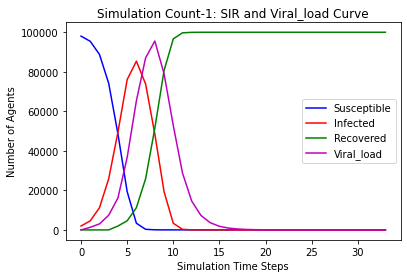

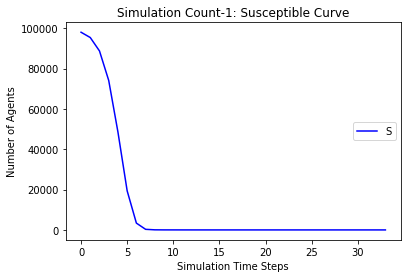

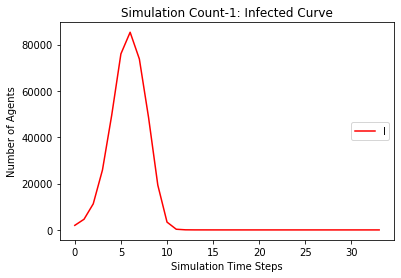

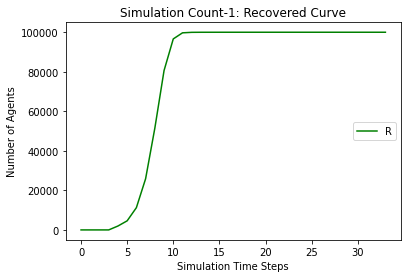

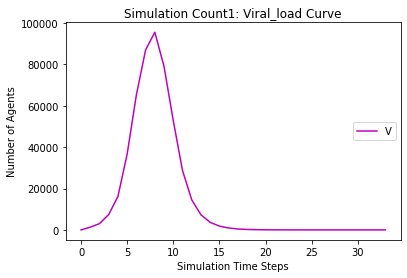

[98028, 95391, 88707, 74358, 48717, 19513, 3391, 298, 53, 15, 9, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[1972, 4609, 11293, 25642, 49311, 75878, 85316, 74060, 48664, 19498, 3382, 290, 45, 8, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4609, 11293, 25642, 51283, 80487, 96609, 99702, 99947, 99985, 99991, 99992, 99992, 99993, 99993, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994]
[0.0, 1317.0, 3091.5, 7011.75, 15850.875, 34343.4375, 65180.71875, 79203.359375, 92093.6796875, 81980.83984375, 54965.419921875, 29908.7099609375, 15167.35498046875, 7613.677490234375, 3810.8387451171875, 1906.4193725585938, 954.2096862792969, 478.10484313964844, 240.05242156982422, 120.02621078491211, 60.013105392456055, 30.006552696228027, 15.003276348114014, 7.501638174057007, 3.7508190870285034, 1.8754095435142517, 0.9377047717571259, 0.4688523858785629, 0.23442619293928146, 0.117213096469

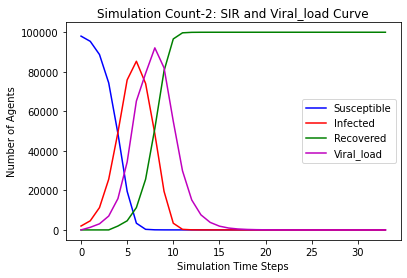

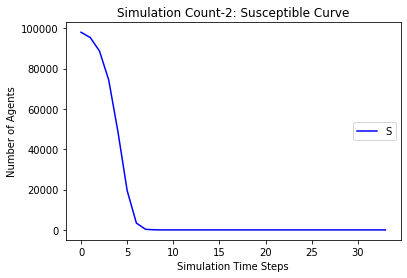

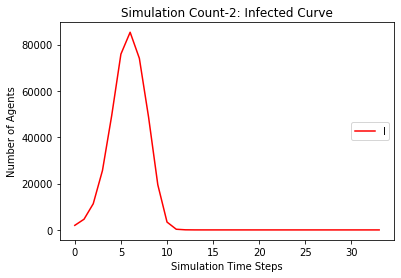

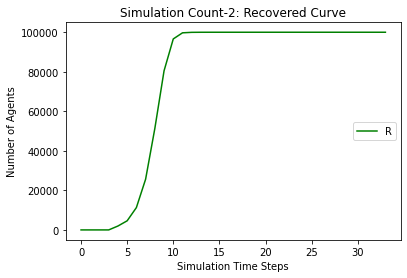

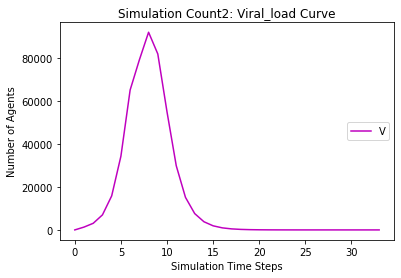

[98028, 95453, 88991, 74255, 48712, 19409, 3288, 281, 64, 21, 12, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[1972, 4547, 11009, 25745, 49316, 76044, 85703, 73974, 48648, 19388, 3276, 272, 56, 14, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4547, 11009, 25745, 51288, 80591, 96712, 99719, 99936, 99979, 99988, 99991, 99992, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993]
[0.0, 1337.0, 3071.5, 7454.75, 16019.375, 35445.6875, 69217.84375, 84713.921875, 93308.9609375, 79987.48046875, 53878.740234375, 29276.3701171875, 14837.18505859375, 7466.592529296875, 3741.2962646484375, 1873.6481323242188, 938.8240661621094, 470.4120330810547, 235.20601654052734, 117.60300827026367, 58.801504135131836, 29.400752067565918, 14.700376033782959, 7.3501880168914795, 3.6750940084457397, 1.8375470042228699, 0.9187735021114349, 0.45938675105571747, 0.22969337552785873, 0.114846687

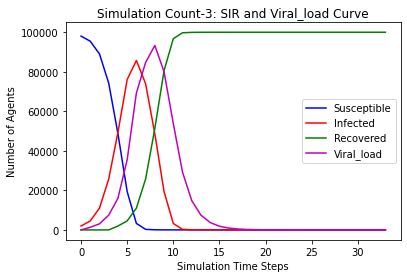

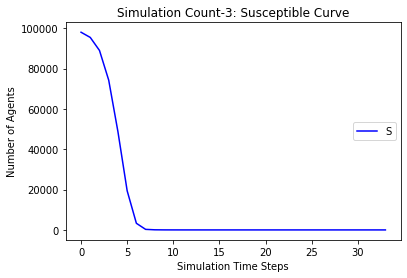

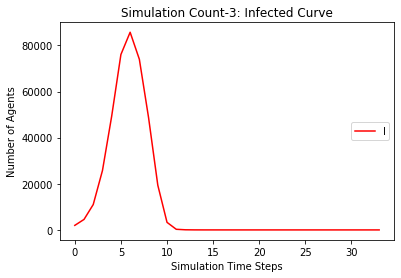

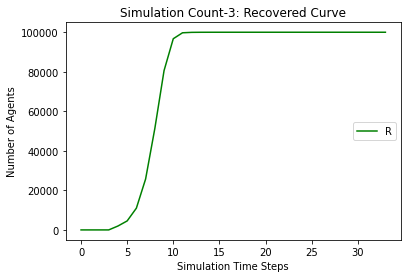

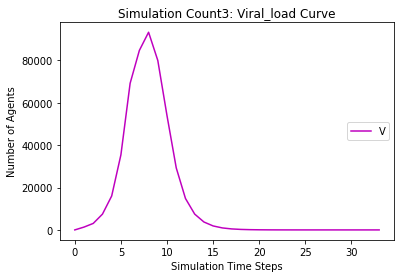

[98028, 95317, 88778, 74259, 48342, 19212, 3262, 300, 50, 12, 6, 6, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1972, 4683, 11222, 25741, 49686, 76105, 85516, 73959, 48292, 19200, 3256, 294, 46, 9, 3, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4683, 11222, 25741, 51658, 80788, 96738, 99700, 99950, 99988, 99994, 99994, 99996, 99997, 99997, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998]
[0.0, 1324.0, 3098.0, 7234.0, 16953.0, 38748.5, 62373.25, 94246.625, 92814.3125, 77431.15625, 51953.578125, 28198.7890625, 14293.39453125, 7174.697265625, 3593.3486328125, 1797.67431640625, 901.837158203125, 451.9185791015625, 225.95928955078125, 112.97964477539062, 56.48982238769531, 28.244911193847656, 14.122455596923828, 7.061227798461914, 3.530613899230957, 1.7653069496154785, 0.8826534748077393, 0.44132673740386963, 0.22066336870193481, 0.11033168435096741, 0.055165842175483704, 0.0275829

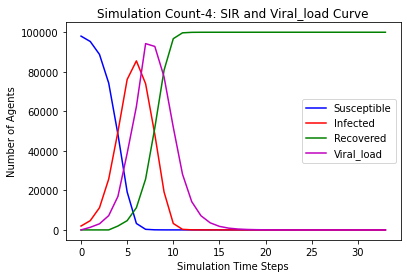

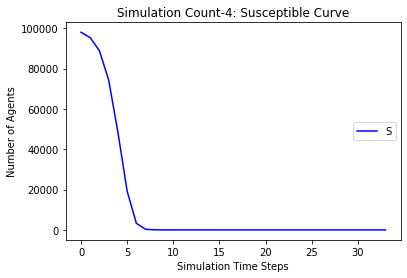

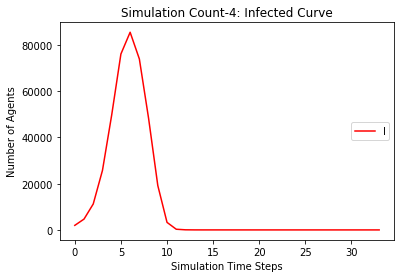

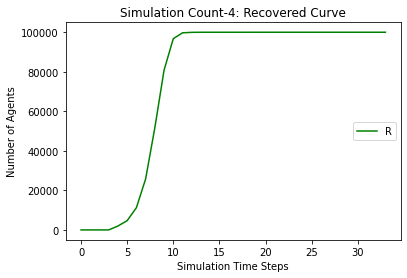

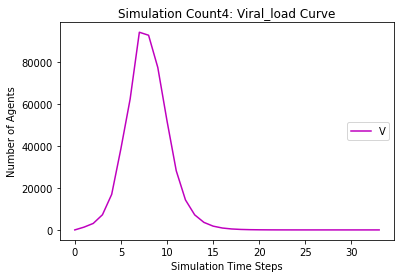

[98028, 95394, 88877, 74809, 49426, 20148, 3493, 328, 44, 13, 8, 7, 7, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[1972, 4606, 11123, 25191, 48602, 75246, 85384, 74481, 49382, 20135, 3485, 321, 37, 8, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4606, 11123, 25191, 50574, 79852, 96507, 99672, 99956, 99987, 99992, 99993, 99993, 99995, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996]
[0.0, 1323.0, 3046.5, 7054.25, 16933.125, 32728.5625, 63037.28125, 91041.640625, 87855.8203125, 78545.91015625, 52102.955078125, 28456.4775390625, 14450.23876953125, 7245.119384765625, 3627.5596923828125, 1815.7798461914062, 909.8899230957031, 455.94496154785156, 227.97248077392578, 113.98624038696289, 56.993120193481445, 28.496560096740723, 14.248280048370361, 7.124140024185181, 3.5620700120925903, 1.7810350060462952, 0.8905175030231476, 0.4452587515115738, 0.2226293757557869, 0.1113146878778

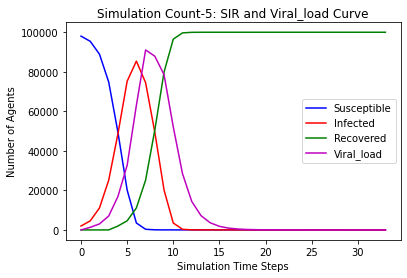

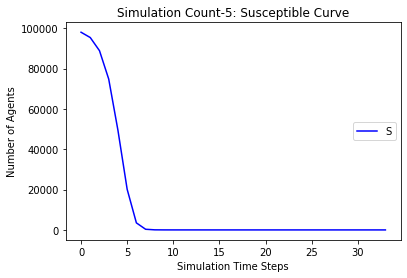

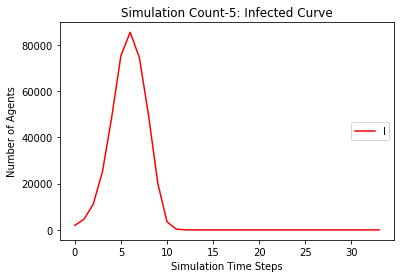

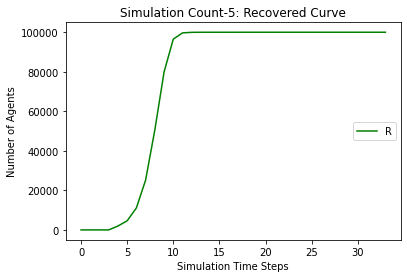

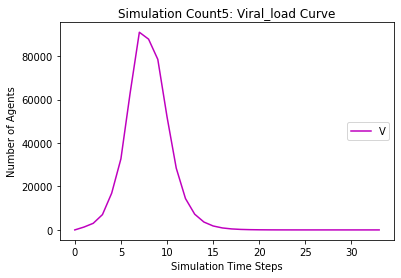

[98028, 95513, 89057, 74752, 48954, 19693, 3337, 285, 49, 14, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[1972, 4487, 10943, 25248, 49074, 75820, 85720, 74467, 48905, 19679, 3328, 279, 43, 8, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4487, 10943, 25248, 51046, 80307, 96663, 99715, 99951, 99986, 99991, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994, 99994]
[0.0, 1323.0, 3003.5, 6933.75, 16481.875, 37659.9375, 66720.96875, 84761.484375, 95394.7421875, 79427.37109375, 52840.685546875, 28776.3427734375, 14564.17138671875, 7307.085693359375, 3657.5428466796875, 1830.7714233398438, 915.3857116699219, 457.69285583496094, 228.84642791748047, 114.42321395874023, 57.21160697937012, 28.60580348968506, 14.30290174484253, 7.151450872421265, 3.5757254362106323, 1.7878627181053162, 0.8939313590526581, 0.44696567952632904, 0.22348283976316452, 0.11174141988158

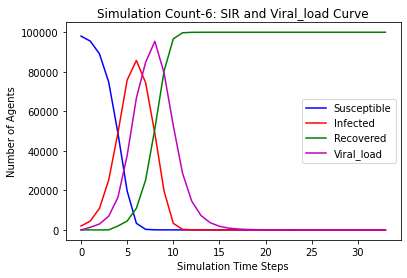

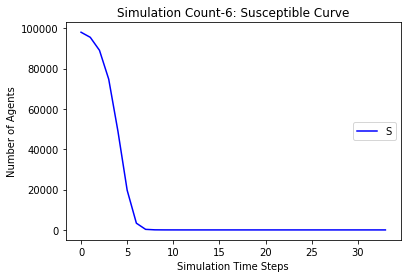

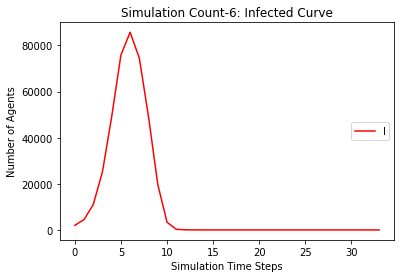

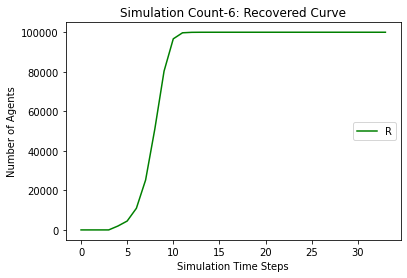

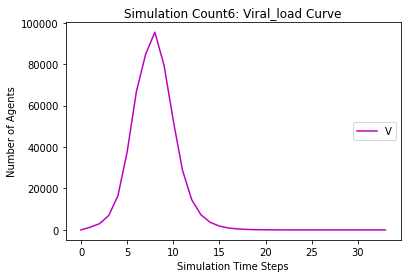

[98028, 95362, 88650, 74286, 49287, 19952, 3578, 316, 39, 17, 7, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1972, 4638, 11350, 25714, 48741, 75410, 85072, 73970, 49248, 19935, 3571, 313, 37, 15, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4638, 11350, 25714, 50713, 80048, 96422, 99684, 99961, 99983, 99993, 99997, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998, 99998]
[0.0, 1311.0, 3177.5, 6944.75, 15120.375, 40241.1875, 64401.59375, 94349.796875, 98973.8984375, 83277.94921875, 54853.974609375, 29989.9873046875, 15219.99365234375, 7631.996826171875, 3821.9984130859375, 1911.9992065429688, 955.9996032714844, 477.9998016357422, 238.9999008178711, 119.49995040893555, 59.74997520446777, 29.874987602233887, 14.937493801116943, 7.468746900558472, 3.734373450279236, 1.867186725139618, 0.933593362569809, 0.4667966812849045, 0.23339834064245224, 0.11669917032122612

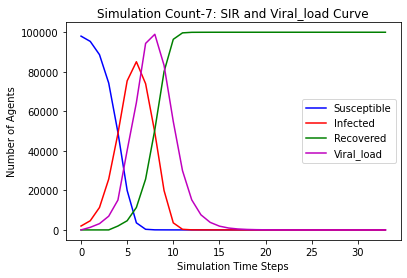

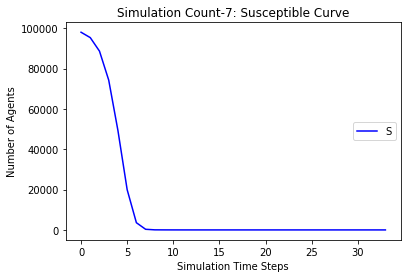

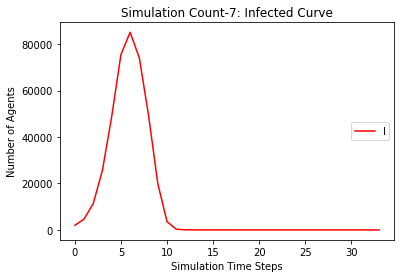

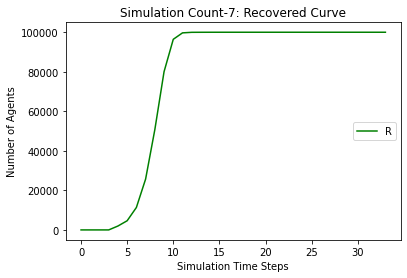

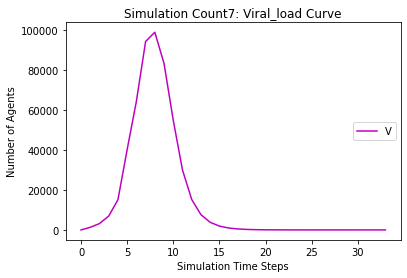

[98028, 95334, 88562, 73972, 48185, 19326, 3194, 304, 59, 19, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[1972, 4666, 11438, 26028, 49843, 76008, 85368, 73668, 48126, 19307, 3185, 297, 52, 12, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4666, 11438, 26028, 51815, 80674, 96806, 99696, 99941, 99981, 99991, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993]
[0.0, 1325.0, 3074.5, 7149.25, 16831.625, 37828.8125, 60939.40625, 85489.703125, 92493.8515625, 78730.92578125, 52374.462890625, 28547.2314453125, 14489.61572265625, 7280.807861328125, 3650.4039306640625, 1826.2019653320312, 913.1009826660156, 456.5504913330078, 228.2752456665039, 114.13762283325195, 57.06881141662598, 28.53440570831299, 14.267202854156494, 7.133601427078247, 3.5668007135391235, 1.7834003567695618, 0.8917001783847809, 0.44585008919239044, 0.22292504459619522, 0.11146252229809

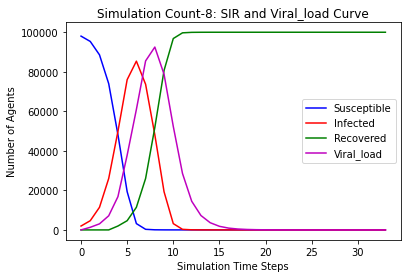

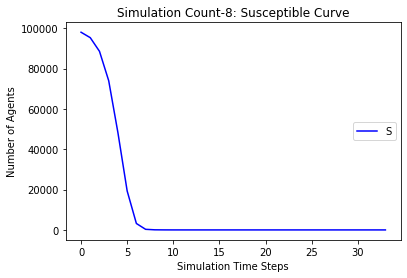

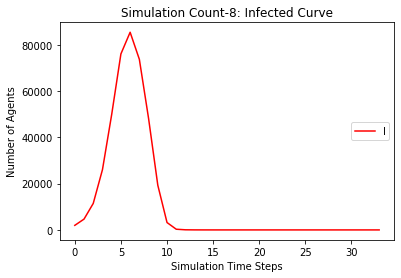

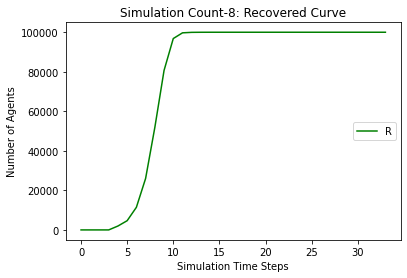

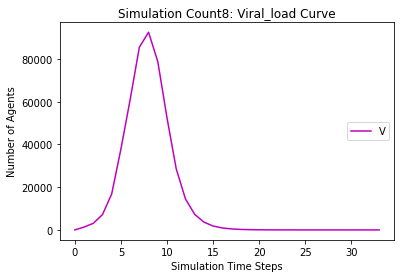

[98028, 95481, 88978, 74905, 49844, 20644, 3731, 326, 42, 12, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[1972, 4519, 11022, 25095, 48184, 74837, 85247, 74579, 49802, 20632, 3726, 322, 38, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4519, 11022, 25095, 50156, 79356, 96269, 99674, 99958, 99988, 99995, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996, 99996]
[0.0, 1303.0, 2977.5, 6735.75, 15975.875, 38875.9375, 74712.96875, 101940.484375, 106165.2421875, 88671.62109375, 58627.810546875, 31940.9052734375, 16191.45263671875, 8118.726318359375, 4064.3631591796875, 2032.1815795898438, 1016.0907897949219, 508.04539489746094, 254.02269744873047, 127.01134872436523, 63.50567436218262, 31.75283718109131, 15.876418590545654, 7.938209295272827, 3.9691046476364136, 1.9845523238182068, 0.9922761619091034, 0.4961380809545517, 0.24806904047727585, 0.12403452023

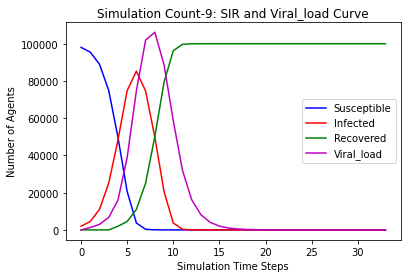

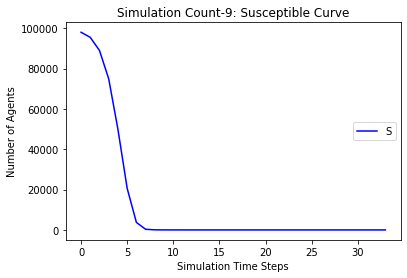

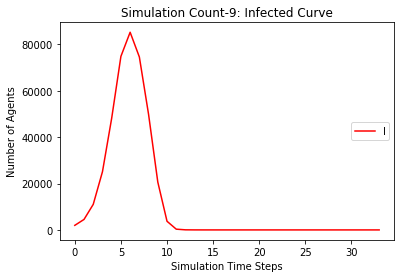

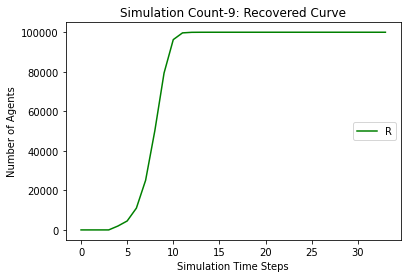

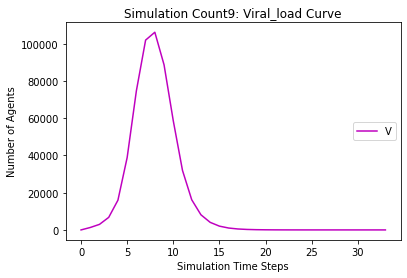

[98028, 95448, 88992, 74564, 48139, 18670, 3049, 245, 46, 17, 12, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[1972, 4552, 11008, 25436, 49889, 76778, 85943, 74319, 48093, 18653, 3037, 236, 37, 10, 5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1972, 4552, 11008, 25436, 51861, 81330, 96951, 99755, 99954, 99983, 99988, 99991, 99991, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993, 99993]
[0.0, 1304.0, 3043.0, 7347.5, 18798.75, 42874.375, 67056.1875, 87074.09375, 101172.046875, 84068.0234375, 54834.01171875, 29539.005859375, 14930.5029296875, 7484.25146484375, 3749.125732421875, 1876.5628662109375, 940.2814331054688, 471.1407165527344, 235.5703582763672, 117.7851791381836, 58.8925895690918, 29.4462947845459, 14.72314739227295, 7.361573696136475, 3.6807868480682373, 1.8403934240341187, 0.9201967120170593, 0.46009835600852966, 0.23004917800426483, 0.11502458900213242, 0.0575122

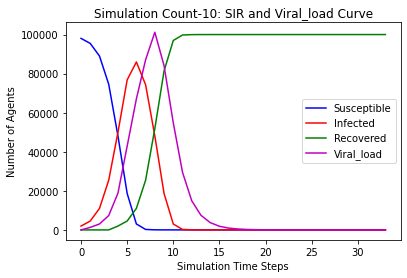

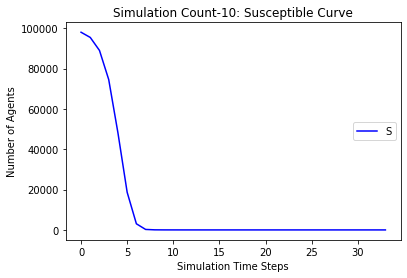

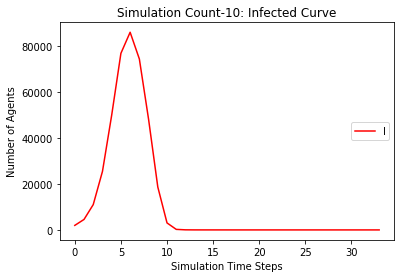

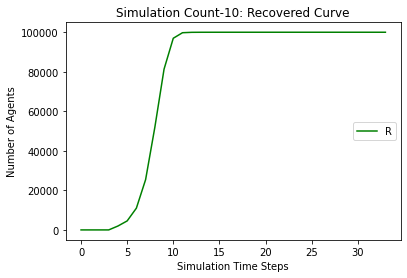

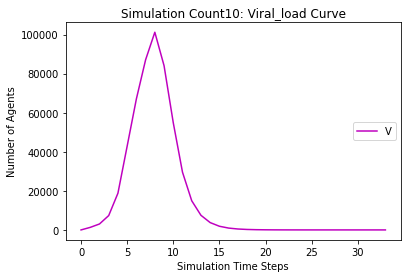

In [ ]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj > 0.01 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

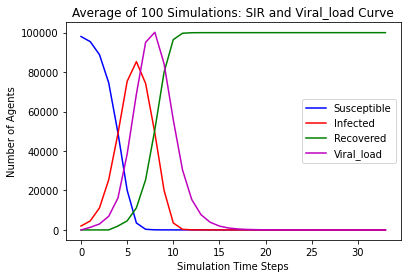

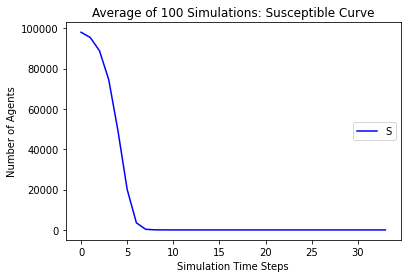

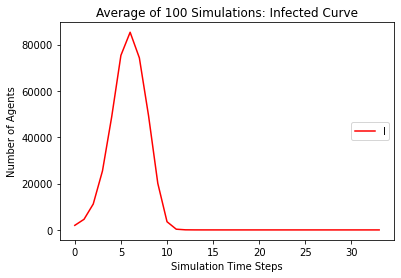

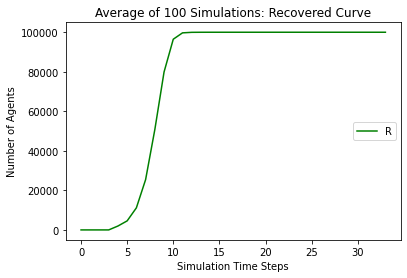

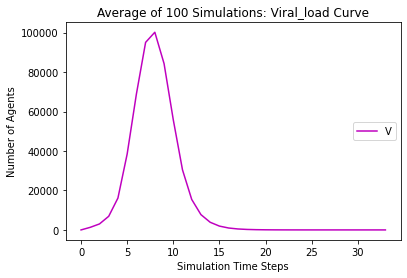

In [ ]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.legend(("Viral_load"),loc='center right')
plt.show()  


  
